Jupyter Octave Kernel
============

Interact with Octave in Notebook. All commands are interpreted by Octave.  Since this is a [MetaKernel](https://github.com/Calysto/metakernel), a standard set of magics are available.  Help on commands is available using the `%help` magic or using `?` with a command.

In [1]:
% add folder with all of our functions to PATH
addpath("src")

In [21]:
% import data using a little wrapper script around xlsread.m
data = ImportSurvey('./src/data/farm.xlsx');

In [23]:
% strategic intervention variables -- baseline
PurchaseYear_Borbon=NaN; PurchaseYear_Catuai=NaN; 
Intercrop_Catuai=NaN; Intercrop_Borbon=NaN; 
num_years = 50;

In [24]:
% create baseline simulation
[Year, Yield_Orig] = ProdSimulation(data, num_years, PurchaseYear_Borbon, PurchaseYear_Catuai, Intercrop_Catuai, Intercrop_Borbon);

In [25]:
% Uncomment following line to purchase land at specified year
%PurchaseYear_Borbon=5;  % 20c. of Borbon
%PurchaseYear_Catuai=5; % 20c. of Catuai

## Intercropping Interventions
These were found to have minimal impact on long-term sustainability, but may help ease small declines.

In [26]:
% Uncomment following line to intercrop Catuai in declining
% Catuai fields at specified year
%Intercrop_Catuai=5;

% Uncomment following line to start intercropping Borbon in 
% declining Catuai fields at specified year
%Intercrop_Borbon=10;

In [27]:
[Year, Yield] = ProdSimulation(data, num_years, PurchaseYear_Borbon, PurchaseYear_Catuai, Intercrop_Catuai, Intercrop_Borbon);

## Compare Strategic Intervention to Baseline Yield Forecast

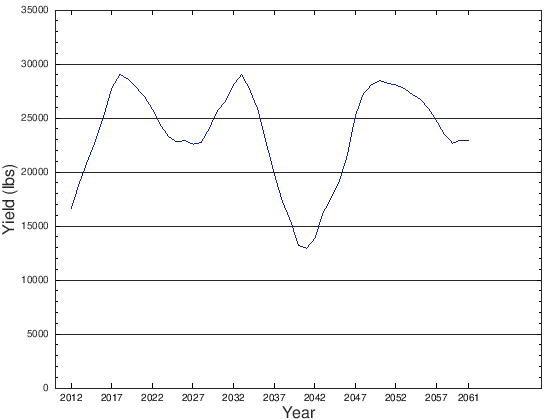

In [28]:
comparativeline(Year,[Yield_Orig Yield]);

In [ ]:
t = linspace(0,6*pi,100);
plot(sin(t))
grid on
hold on
plot(cos(t), 'r')

In [ ]:
%plot --format png
tx = ty = linspace (-8, 8, 41)';
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;
mesh (tx, ty, tz);

In [ ]:
a = [1,2,3]

In [ ]:
b = a + 3;

In [ ]:
disp(b)

The width or the height can be specified to constrain the image while maintaining the original aspect ratio.

In [ ]:
%plot -f png -w 600

% butterworth filter, order 2, cutoff pi/2 radians
b = [0.292893218813452  0.585786437626905  0.292893218813452];
a = [1  0  0.171572875253810];
freqz(b, a, 32);

Multiple figures can be drawn.  Note that when using imshow the image will be created as a PNG with the raw
image dimensions unless the image has a title or labels.

In [ ]:
% small image
imshow(randn(100,100))

% let's change the data range
figure
imshow(randn(100,100), [-10 10])

% let's try automatic range and different size
figure
imshow(randn(100,200), [])
colormap('autumn')

In [ ]:
% Create an RGB image with no title or labels
close all hidden
image = zeros(300,400,3);
image(1:100,:,1) = 0.9;  % Red
image(101:200,:,2) = rand(100,400);  % Green
image(201:300,:,3) = 0.9;  % Blue
imshow(image)

In [ ]:
% image that is too small to display raw (<100 pixels)
imshow(rand(50,50))

In [ ]:
% let's add a title - this produces full figure
imshow(rand(100,100))
title('Hello')

% let's create an image next to a plot
figure
subplot(121)
plot([1,2,3])
subplot(122)
imshow(randn(100,100))

In [ ]:
%lsmagic